In [13]:
import analytical_solutions
%matplotlib inline

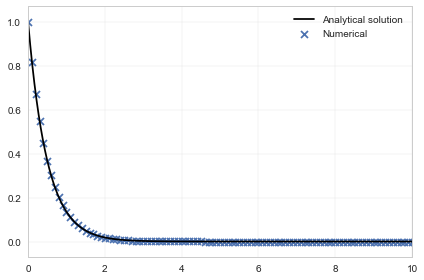

In [14]:
analytical_solutions.reaction_equation_plot()

Simulation starts  with following params:
	tend = 5.0,
	dt = 1.00e-03,
	L = 100.0,
	dx = 1.00e-01,
	w = 5.00
Simulation started:
	 2017-08-15 21:29:39


Estimated time of the code execution:
	 0h:00m:02s
Will finish approx.:
	 2017-08-15 21:29:42


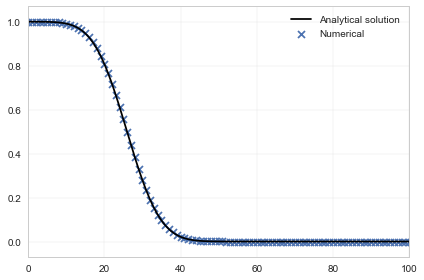

In [15]:
analytical_solutions.transport_equation_plot()

Simulation starts  with following params:
	tend = 5.0,
	dt = 1.00e-03,
	L = 30.0,
	dx = 1.00e-01,
	w = 5.00
Simulation started:
	 2017-08-15 21:30:53


Estimated time of the code execution:
	 0h:00m:01s
Will finish approx.:
	 2017-08-15 21:30:54


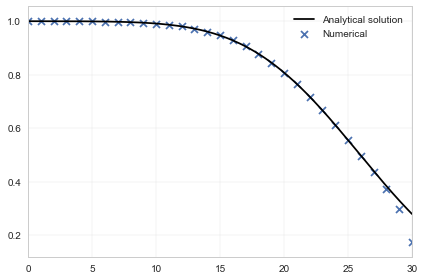

In [18]:
analytical_solutions.transport_equation_boundary_effect()